In [1]:
import numpy as np
import pandas as pd

### Read the file

In [2]:
file = pd.ExcelFile('OSA_DB_UPM.xlsx')
df = file.parse('Sheet1')
del df["Diseases"]

### Consider only males in the dataframe

In [3]:
df_male = df[df['Gender'] == 'hombre']
df_male.head(10)

,Patient,Gender,IAH,Weight,Height,Age,Cervical
0,P0002,hombre,29.6,119,174,56,48.0
1,P0004,hombre,19.7,78,168,39,42.0
2,P0005,hombre,9.0,80,173,32,40.0
3,P0006,hombre,2.0,109,190,32,42.0
4,P0007,hombre,34.0,86,169,39,42.0
5,P0008,hombre,60.0,145,172,47,44.0
6,P0009,hombre,22.0,72,165,40,42.0
7,P0010,hombre,11.0,80,180,28,38.0
8,P0013,hombre,3.7,90,180,36,40.0
11,P0016,hombre,26.0,95,166,77,46.0


### Create column OSA to qualify healthy (AHI<=10), mild (10<AHI<30) and severe (AHI>=30) cases

In [4]:
df_OSA = df_male.assign(OSA = lambda dataframe: dataframe['IAH'].map(lambda IAH: 'Severe' if IAH >= 30 else 'Healthy' if IAH<=10 else 'Mild'))
df_OSA.head()

,Patient,Gender,IAH,Weight,Height,Age,Cervical,OSA
0,P0002,hombre,29.6,119,174,56,48.0,Mild
1,P0004,hombre,19.7,78,168,39,42.0,Mild
2,P0005,hombre,9.0,80,173,32,40.0,Healthy
3,P0006,hombre,2.0,109,190,32,42.0,Healthy
4,P0007,hombre,34.0,86,169,39,42.0,Severe


### Drop the lines with mild cases

In [5]:
df_OSA.drop(df_OSA.loc[df_OSA['OSA']=='Mild'].index, inplace=True)
df_OSA.head(10)

,Patient,Gender,IAH,Weight,Height,Age,Cervical,OSA
2,P0005,hombre,9.0,80,173,32,40.0,Healthy
3,P0006,hombre,2.0,109,190,32,42.0,Healthy
4,P0007,hombre,34.0,86,169,39,42.0,Severe
5,P0008,hombre,60.0,145,172,47,44.0,Severe
8,P0013,hombre,3.7,90,180,36,40.0,Healthy
15,P0020,hombre,4.3,89,171,44,45.0,Healthy
17,P0022,hombre,56.0,113,177,33,46.0,Severe
19,P0024,hombre,53.6,107,170,48,46.0,Severe
20,P0025,hombre,2.1,70,174,53,38.0,Healthy
22,P0027,hombre,47.0,100,180,62,48.0,Severe


### Define the BMI

In [6]:
#BMI = Weight/(Height/100.0)^2
df_OSA['BMI'] = df_OSA['Weight']/((df_OSA['Height']/100.0)**2)
df_OSA.describe()

,IAH,Weight,Height,Age,Cervical,BMI
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,24.917906,92.407942,175.635379,47.574007,42.180505,29.906508
std,22.747519,18.624522,7.405974,12.233497,3.384200,5.462032
min,0.000000,61.000000,152.000000,22.000000,34.000000,20.619254
25%,4.800000,80.000000,170.000000,37.000000,40.000000,26.061679
50%,10.000000,89.000000,175.000000,47.000000,42.000000,28.997894
75%,40.900000,101.000000,180.000000,56.000000,44.000000,32.407407
max,102.000000,162.000000,197.000000,80.000000,53.000000,52.298554


### EDA on the dataset

In [7]:
df_OSA.corr()

,IAH,Weight,Height,Age,Cervical,BMI
IAH,1.000000,0.467819,0.007829,0.217140,0.482497,0.501121
Weight,0.467819,1.000000,0.407865,-0.110677,0.730604,0.908265
Height,0.007829,0.407865,1.000000,-0.373073,0.179579,-0.006061
Age,0.217140,-0.110677,-0.373073,1.000000,0.169456,0.049905
Cervical,0.482497,0.730604,0.179579,0.169456,1.000000,0.716209
BMI,0.501121,0.908265,-0.006061,0.049905,0.716209,1.000000


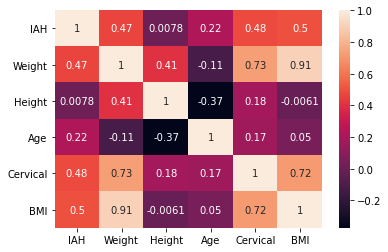

In [8]:
import seaborn as sn

sn.heatmap(df_OSA.corr(), annot=True)

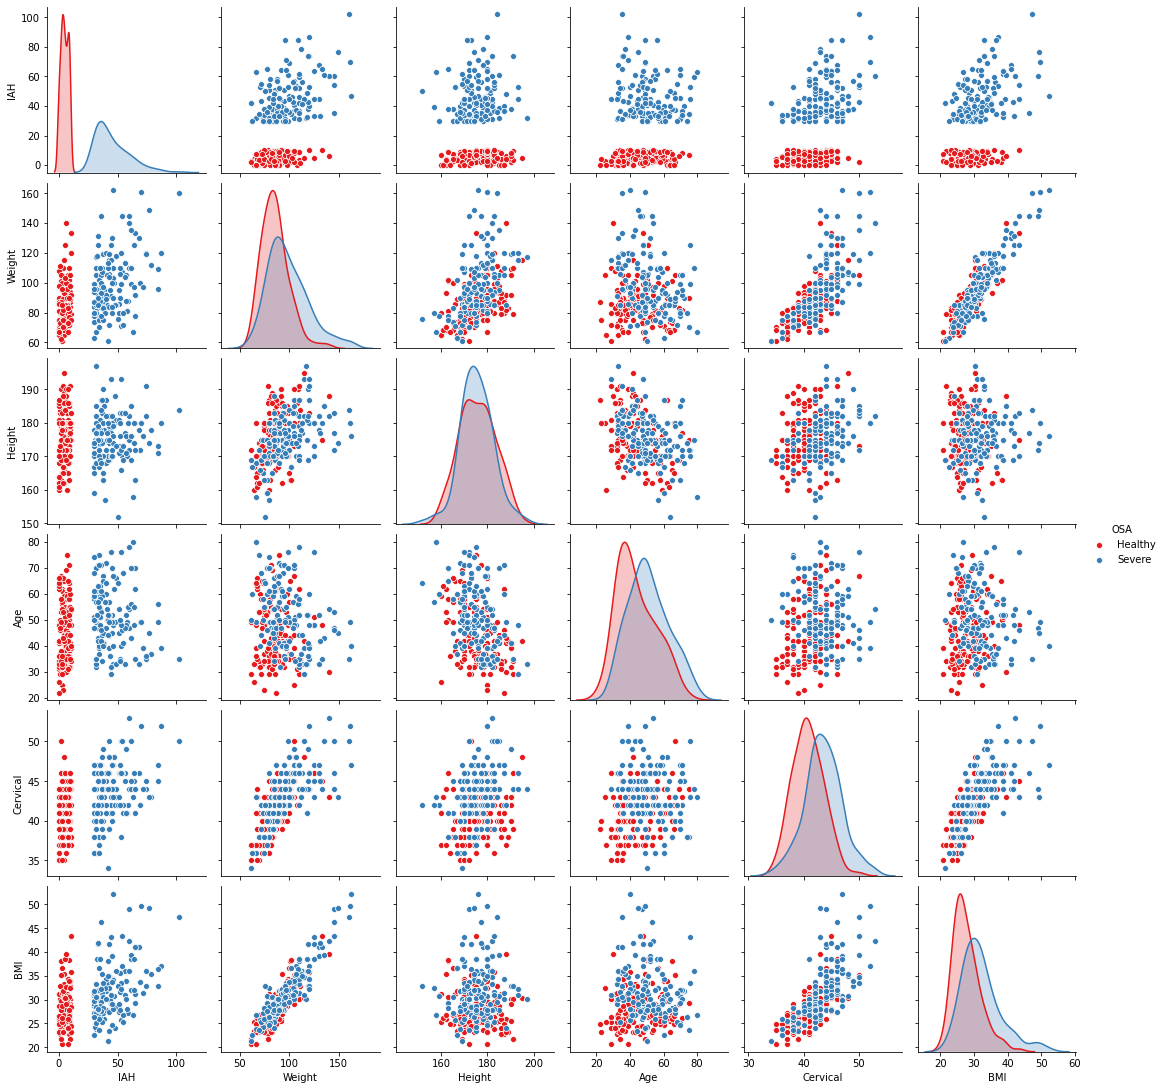

In [9]:
sn.pairplot(df_OSA, hue="OSA", palette="Set1")

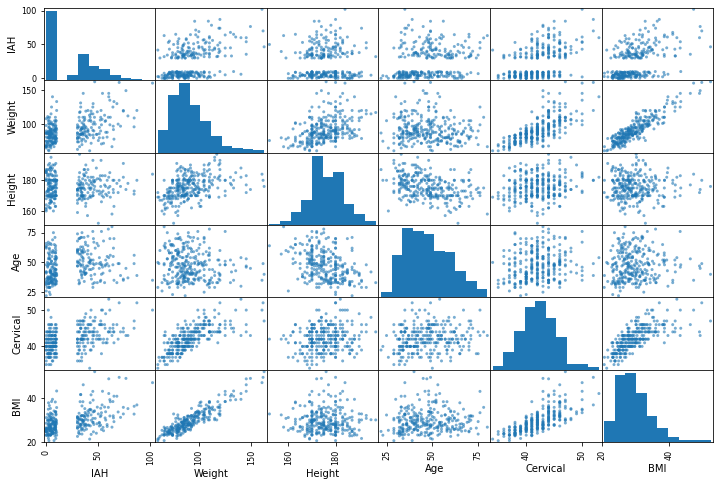

In [10]:
from pandas.plotting import scatter_matrix

axes = scatter_matrix(df_OSA, alpha=0.6, figsize=(12, 8), diagonal='hist')

### Write the dataset to an Excel file

In [12]:
df_OSA.to_excel (r'OSA_extreme_male.xlsx', index = None, header=True) 